# Change-Log
Enter the date, version number, your initials any what changed

2024-10-16 v8 FS:
- removed PF3
- did lots of PF coil location optimization (in a separate file), increased size and rotated
- NT case is now slightly out of date
- 


2024-10-14 v7 FS: 
- added '.geqdsk' file extension to output of g files
- removed help text and condensed code
- added two parallel cases, using same equil target inputs: NT and Oval PF coil shapes from magnet group
    - input differences between the two cases are: PF and CS locations
    - change case by changing `tf_coil_shape` variable in inputs


2024-10-14 v6 FS: updated to newest equil targets, reverted VV to box

2024-09-25 v5 DB: Added toroidal current, pressure profile, and normalized beta checks

2024-09-25 v4 FS: Updated values from core with q_95>2.3, formed new limiter surface, added code to automatically produce vv_outer, added eqdsk output

In [1]:
import os
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['lines.linewidth']=2
plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

# Inputs!


In [2]:
# will output eqdsk files with correct naming if you fill out these files
nb_name = 'FDC24_TokaMaker_2024-10-17_v9_FS'

Ip_target = 9.72e6

R0 = 2.0 # m
Z0 = 0.0
a = 0.72
kappa = 1.5
delta = -0.5

B0=12 # Tesla

tf_coil_shape = 'oval' # 'nt' or 'oval'


# new TF coil shapes 2024-10-17 FS
# low field side gap = 0.20 m, high field side gap = 0.68 m 
tf_oval_inner = np.array([[ 3.40000000e+00,  0.00000000e+00],
       [ 3.39445979e+00,  2.69811774e-01],
       [ 3.37639864e+00,  5.32635566e-01],
       [ 3.34157737e+00,  7.81664375e-01],
       [ 3.28334239e+00,  1.01044849e+00],
       [ 3.19364117e+00,  1.21306252e+00],
       [ 3.06495281e+00,  1.38425886e+00],
       [ 2.89303669e+00,  1.51960363e+00],
       [ 2.67976401e+00,  1.61559146e+00],
       [ 2.43475780e+00,  1.66973633e+00],
       [ 2.17464526e+00,  1.68063589e+00],
       [ 1.91967554e+00,  1.64800788e+00],
       [ 1.68884489e+00,  1.57269732e+00],
       [ 1.49554697e+00,  1.45665473e+00],
       [ 1.34545217e+00,  1.30288555e+00],
       [ 1.23706316e+00,  1.11537231e+00],
       [ 1.16412511e+00,  8.98971520e-01],
       [ 1.11854981e+00,  6.59287838e-01],
       [ 1.09280397e+00,  4.02528947e-01],
       [ 1.08136243e+00,  1.35344769e-01],
       [ 1.08136243e+00, -1.35344769e-01],
       [ 1.09280397e+00, -4.02528947e-01],
       [ 1.11854981e+00, -6.59287838e-01],
       [ 1.16412511e+00, -8.98971520e-01],
       [ 1.23706316e+00, -1.11537231e+00],
       [ 1.34545217e+00, -1.30288555e+00],
       [ 1.49554697e+00, -1.45665473e+00],
       [ 1.68884489e+00, -1.57269732e+00],
       [ 1.91967554e+00, -1.64800788e+00],
       [ 2.17464526e+00, -1.68063589e+00],
       [ 2.43475780e+00, -1.66973633e+00],
       [ 2.67976401e+00, -1.61559146e+00],
       [ 2.89303669e+00, -1.51960363e+00],
       [ 3.06495281e+00, -1.38425886e+00],
       [ 3.19364117e+00, -1.21306252e+00],
       [ 3.28334239e+00, -1.01044849e+00],
       [ 3.34157737e+00, -7.81664375e-01],
       [ 3.37639864e+00, -5.32635566e-01],
       [ 3.39445979e+00, -2.69811774e-01],
       [ 3.40000000e+00, -4.11971183e-16]])

tf_oval_outer = np.array([[ 3.8       ,  0.00410629],
       [ 3.79417804,  0.28763952],
       [ 3.77449296,  0.57409459],
       [ 3.73466484,  0.85893052],
       [ 3.66269691,  1.14166639],
       [ 3.54087528,  1.4168329 ],
       [ 3.3533577 ,  1.66629078],
       [ 3.10193025,  1.8642326 ],
       [ 2.80633566,  1.99727113],
       [ 2.48668795,  2.06791131],
       [ 2.15750966,  2.08170496],
       [ 1.83147745,  2.0399832 ],
       [ 1.52175921,  1.93893486],
       [ 1.24538258,  1.77301761],
       [ 1.02421609,  1.54643686],
       [ 0.87077   ,  1.28097478],
       [ 0.77629939,  1.00068879],
       [ 0.72230213,  0.71671341],
       [ 0.69365931,  0.43106335],
       [ 0.68136243,  0.14390538],
       [ 0.68136243, -0.14390538],
       [ 0.69365931, -0.43106335],
       [ 0.72230213, -0.71671341],
       [ 0.77629939, -1.00068879],
       [ 0.87077   , -1.28097478],
       [ 1.02421609, -1.54643686],
       [ 1.24538258, -1.77301761],
       [ 1.52175921, -1.93893486],
       [ 1.83147745, -2.0399832 ],
       [ 2.15750966, -2.08170496],
       [ 2.48668795, -2.06791131],
       [ 2.80633566, -1.99727113],
       [ 3.10193025, -1.8642326 ],
       [ 3.3533577 , -1.66629078],
       [ 3.54087528, -1.4168329 ],
       [ 3.66269691, -1.14166639],
       [ 3.73466484, -0.85893052],
       [ 3.77449296, -0.57409459],
       [ 3.79417804, -0.28763952],
       [ 3.8       , -0.00410629]])


tf_nt_outer = np.array([[ 3.80000000e+00,  8.87924111e-04],
       [ 3.79878801e+00,  2.73880604e-01],
       [ 3.79450659e+00,  5.43052886e-01],
       [ 3.78506437e+00,  8.03879841e-01],
       [ 3.76621052e+00,  1.05503371e+00],
       [ 3.72978737e+00,  1.29881679e+00],
       [ 3.65957350e+00,  1.54042328e+00],
       [ 3.52691334e+00,  1.77554599e+00],
       [ 3.31025987e+00,  1.96534753e+00],
       [ 3.03798701e+00,  2.06556278e+00],
       [ 2.75235389e+00,  2.08239013e+00],
       [ 2.46252923e+00,  2.03905728e+00],
       [ 2.16655966e+00,  1.94683015e+00],
       [ 1.86838051e+00,  1.80927016e+00],
       [ 1.57803058e+00,  1.62782093e+00],
       [ 1.30851861e+00,  1.40401089e+00],
       [ 1.07338820e+00,  1.14055742e+00],
       [ 8.85122446e-01,  8.42324524e-01],
       [ 7.53887913e-01,  5.16896969e-01],
       [ 6.86590147e-01,  1.74254720e-01],
       [ 6.86590147e-01, -1.74254720e-01],
       [ 7.53887913e-01, -5.16896969e-01],
       [ 8.85122446e-01, -8.42324524e-01],
       [ 1.07338820e+00, -1.14055742e+00],
       [ 1.30851861e+00, -1.40401089e+00],
       [ 1.57803058e+00, -1.62782093e+00],
       [ 1.86838051e+00, -1.80927016e+00],
       [ 2.16655966e+00, -1.94683015e+00],
       [ 2.46252923e+00, -2.03905728e+00],
       [ 2.75235389e+00, -2.08239013e+00],
       [ 3.03798701e+00, -2.06556278e+00],
       [ 3.31025987e+00, -1.96534753e+00],
       [ 3.52691334e+00, -1.77554599e+00],
       [ 3.65957350e+00, -1.54042328e+00],
       [ 3.72978737e+00, -1.29881679e+00],
       [ 3.76621052e+00, -1.05503371e+00],
       [ 3.78506437e+00, -8.03879841e-01],
       [ 3.79450659e+00, -5.43052886e-01],
       [ 3.79878801e+00, -2.73880604e-01],
       [ 3.80000000e+00, -8.87924111e-04]])

tf_nt_inner = np.array([[ 3.40000000e+00,  0.00000000e+00],
       [ 3.39880213e+00,  2.69811774e-01],
       [ 3.39462169e+00,  5.32635566e-01],
       [ 3.38560658e+00,  7.81664375e-01],
       [ 3.36843200e+00,  1.01044849e+00],
       [ 3.33815984e+00,  1.21306252e+00],
       [ 3.28840803e+00,  1.38425886e+00],
       [ 3.21204426e+00,  1.51960363e+00],
       [ 3.10247667e+00,  1.61559146e+00],
       [ 2.95537155e+00,  1.66973633e+00],
       [ 2.77035853e+00,  1.68063589e+00],
       [ 2.55213136e+00,  1.64800788e+00],
       [ 2.31044940e+00,  1.57269732e+00],
       [ 2.05891201e+00,  1.45665473e+00],
       [ 1.81285491e+00,  1.30288555e+00],
       [ 1.58705154e+00,  1.11537231e+00],
       [ 1.39391532e+00,  8.98971520e-01],
       [ 1.24260998e+00,  6.59287838e-01],
       [ 1.13906733e+00,  4.02528947e-01],
       [ 1.08659015e+00,  1.35344769e-01],
       [ 1.08659015e+00, -1.35344769e-01],
       [ 1.13906733e+00, -4.02528947e-01],
       [ 1.24260998e+00, -6.59287838e-01],
       [ 1.39391532e+00, -8.98971520e-01],
       [ 1.58705154e+00, -1.11537231e+00],
       [ 1.81285491e+00, -1.30288555e+00],
       [ 2.05891201e+00, -1.45665473e+00],
       [ 2.31044940e+00, -1.57269732e+00],
       [ 2.55213136e+00, -1.64800788e+00],
       [ 2.77035853e+00, -1.68063589e+00],
       [ 2.95537155e+00, -1.66973633e+00],
       [ 3.10247667e+00, -1.61559146e+00],
       [ 3.21204426e+00, -1.51960363e+00],
       [ 3.28840803e+00, -1.38425886e+00],
       [ 3.33815984e+00, -1.21306252e+00],
       [ 3.36843200e+00, -1.01044849e+00],
       [ 3.38560658e+00, -7.81664375e-01],
       [ 3.39462169e+00, -5.32635566e-01],
       [ 3.39880213e+00, -2.69811774e-01],
       [ 3.40000000e+00, -4.11971183e-16]])


In [3]:
############## LOAD TOKAMAKER LIBRARY

# tokamaker_python_path = os.getenv('OFT_ROOTPATH')
# if tokamaker_python_path is not None:
    # sys.path.append(os.path.join(tokamaker_python_path,'python'))
from OpenFUSIONToolkit.TokaMaker.meshing import gs_Domain, save_gs_mesh, load_gs_mesh
from OpenFUSIONToolkit.TokaMaker import TokaMaker
from OpenFUSIONToolkit.TokaMaker.util import create_isoflux, read_eqdsk, create_power_flux_fun


#  Build mesh
plasma_dx = 0.04
coil_dx = 0.08
vv_dx = 0.06
vac_dx = 0.15

## Specify VV geometry

In [4]:
# for i in range(len(bottom_inner)):
#     bottom_inner[i,1] -=1.75

# print(bottom_inner)

bottom_inner = np.array( [[1.21715328, 0.20424837],
 [1.3540146,  0.55827887],
 [1.60036496, 0.79248366],
 [2.02189781, 1.08115468],
 [2.15328467, 1.1791939 ],
 [2.24635036, 1.49509804],
 [2.39963504, 1.28812636],
 [2.58576642, 1.3208061 ],
 [2.58029197, 1.08660131],
 [2.61861314, 0.93409586],
 [2.72262774, 0.64542484],
 [2.79379562, 0.30228758]
 ])

# Process the coordinates: reverse order and negate y-values
top_inner = [[x, -y] for x, y in reversed(bottom_inner)]
vv_inner=np.concatenate((bottom_inner,top_inner))


def expand_surface(coordinates, thickness): # gives a VV with thickness of roughly = 'thickness', doesn't work perfectly but good starting point
    # Convert coordinates to numpy array for easier manipulation
    coords = np.array(coordinates)

    # Calculate the centroid of the surface
    centroid = np.mean(coords, axis=0)

    # Calculate vectors from centroid to each point
    vectors = coords - centroid

    # Calculate the normalized normal vectors
    normals = np.zeros_like(vectors)
    for i in range(len(vectors)):
        # Get the next point (wrapping around to the first point if at the end)
        next_point = vectors[(i + 1) % len(vectors)]
        # Calculate the normal vector (perpendicular to the edge)
        normal = np.array([-next_point[1] + vectors[i][1], next_point[0] - vectors[i][0]])
        # Normalize the normal vector
        normals[i] = normal / np.linalg.norm(normal)

    # Calculate the average of adjacent normal vectors for smooth expansion
    avg_normals = (normals + np.roll(normals, 1, axis=0)) / 2

    # Expand the surface by moving each point along its average normal vector
    expanded_coords = coords + thickness * avg_normals

    return expanded_coords.tolist()


vv_outer = expand_surface(vv_inner, 0.06)

bottom_outer  = np.array(
 [
[2.8531704743879276, -0.30838002857902486],
[2.7802263167502943, -0.6616869245613021],
[2.675932371395827, -0.9515765392788136],
[2.6393792867913395, -1.093211305926924],
[2.64, -1.38],
[2.418555445856089, -1.3355291368998643],
[2.23, -1.58],
[2.1065661959245547, -1.2117156219780332],
[1.9870058651808595, -1.1299508799737294],
[1.5627438335021984, -0.8389783338024857],
[1.3053622381166363, -0.5908385340880156],
[1.159171377349811, -0.21506563046997754]
]
)

top_outer = [[x, -y] for x, y in reversed(bottom_outer)]
vv_outer=np.concatenate((bottom_outer,top_outer))



# print(vv_outer)
np.savetxt(nb_name+'_VV'+'.csv',vv_inner,delimiter=',')

# # square VV
# vv_inner = np.array([[1.1, -1.2],[2.96, -1.2],[2.96, 1.2],[1.1, 1.2]])
# vv_outer = np.array([[1.06, -1.24], [3, -1.24],[3, 1.24],[1.06, 1.24]])



# PF and CS Topology

In [5]:
# coordinates for top coils, bottom coils are mirrored, coils go from inner (1) to outer (4) (left to right)

PF1mat = [[1.25, 2.15], [.98, 1.97], [1.13, 2.07], [1.40, 2.20], [1.57, 2.25]]

PF2mat = [[2.9, 2.3], [3.05, 2.26], [3.2, 2.18], [2.75, 2.35], [2.57, 2.38]]

PF4mat = [[3.8,1.5], [3.66, 1.81], [3.76, 1.65], [3.86, 1.38], [3.94, 1.18]]

# i = 3
# j = 3 
# k = 2

if tf_coil_shape == 'nt':

    tf_inner = tf_nt_inner
    tf_outer = tf_nt_outer

    PF1r = 1.3
    PF1z = 1.75
    PF1w = 0.36 # width
    PF1h = 0.36 # height
    PF1rot = 0

    PF2r = 2.2
    PF2z = 2.2
    PF2w = 0.36 # width
    PF2h = 0.36 # height
    PF2rot = 0

    # PF3r = 2.75
    # PF3z = 2.2
    # PF3w = 0.36 # width
    # PF3h = 0.36 # height
    # PF3rot = 0

    PF4r = 4.05
    PF4z = 0.85
    PF4w = 0.36 # width
    PF4h = 0.36 # height
    PF4rot = 0

    CSr = 0.5
    CSz = 0
    CSw = 0.2
    CSh = 3.5
    CSrot = 0
elif tf_coil_shape == 'oval':

    tf_inner = tf_oval_inner
    tf_outer = tf_oval_outer

    PF1r = 1.25
    PF1z = 2.1
    PF1w = 0.75 # width
    PF1h = 0.4 # height 
    PF1rot = 30

    PF2r = 2.75
    PF2z = 2.35
    PF2w = 0.7 # width
    PF2h = 0.45 # height
    PF2rot = -12

    # PF3r = 2.75
    # PF3z = 2.2
    # PF3w = 0.36 # width
    # PF3h = 0.36 # height
    # PF3rot = 0

    PF4r = 3.76
    PF4z = 1.65
    PF4w = 0.36 # width
    PF4h = 0.55 # height
    PF4rot = 30

    CSr = 0.5
    CSz = 0
    CSw = 0.2
    CSh = 3.5
    CSrot = 0

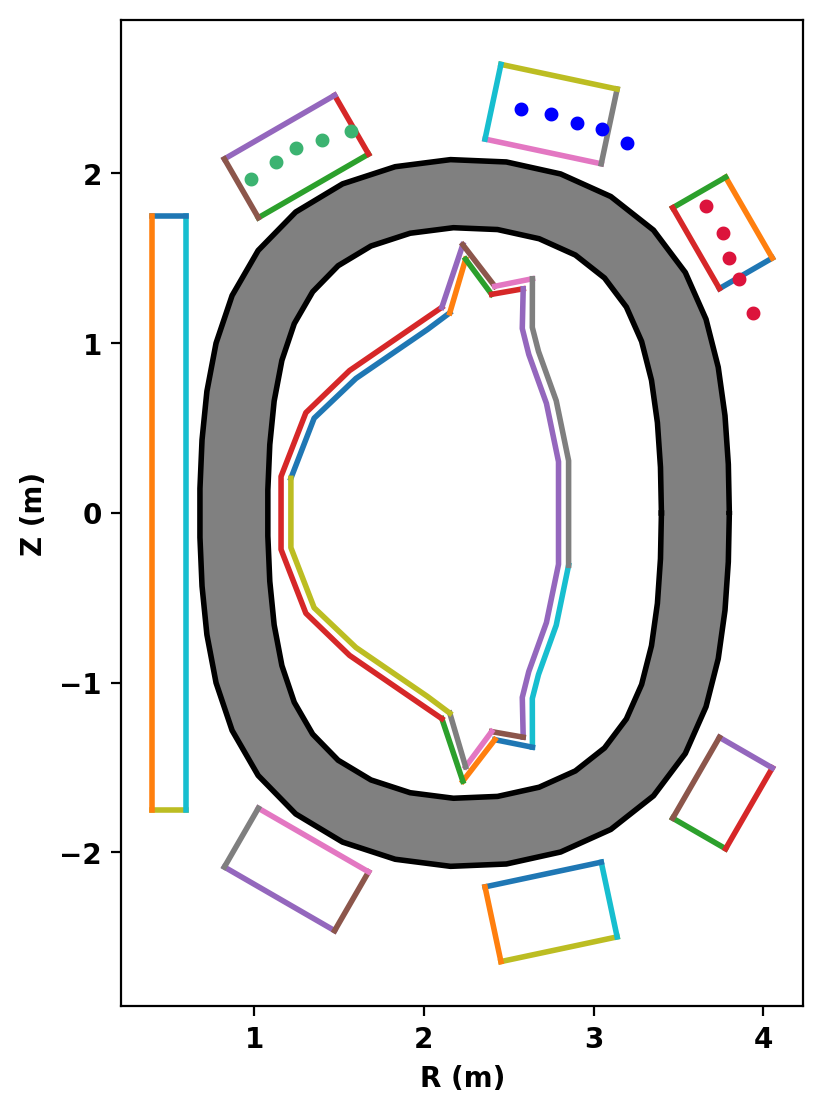

In [6]:
#### PLACE COILS
coils = {
    'CS': {'rc': CSr, 'zc': CSz, 'w': CSw, 'h': CSh, 'rotdeg': CSrot},

    'PF1U': {'rc': PF1r, 'zc': PF1z, 'w': PF1w, 'h': PF1h, 'rotdeg': PF1rot},
    'PF2U': {'rc': PF2r, 'zc': PF2z, 'w': PF2w, 'h': PF2h, 'rotdeg': PF2rot},
    # 'PF3U': {'rc': PF3r, 'zc': PF3z, 'w': PF3w, 'h': PF3h, 'rotdeg': PF3rot},
    'PF4U': {'rc': PF4r, 'zc': PF4z, 'w': PF4w, 'h': PF4h, 'rotdeg': PF4rot},

    'PF1L': {'rc': PF1r, 'zc': -1*PF1z, 'w': PF1w, 'h': PF1h, 'rotdeg': 360-PF1rot},
    'PF2L': {'rc': PF2r, 'zc': -1*PF2z, 'w': PF2w, 'h': PF2h, 'rotdeg': 360-PF2rot},
    # 'PF3L': {'rc': PF3r, 'zc': -1*PF3z, 'w': PF3w, 'h': PF3h, 'rotdeg': 360-PF3rot},
    'PF4L': {'rc': PF4r, 'zc': -1*PF4z, 'w': PF4w, 'h': PF4h, 'rotdeg': 360-PF4rot},
}
############## DEFINE REGIONS AND ATTRIBUTES

# Create a G-S domain
gs_mesh = gs_Domain()
# Define region information for mesh
gs_mesh.define_region('air',vac_dx,'boundary')
gs_mesh.define_region('plasma',plasma_dx,'plasma')
gs_mesh.define_region('vv',vv_dx,'conductor',eta=1e-6)
# Define each of the coils
for key, coil in coils.items():
    gs_mesh.define_region(key,coil_dx,'coil')

# Define vaccum vessel geometry
gs_mesh.add_annulus(vv_inner,'plasma',vv_outer,'vv',parent_name='air')
# Define the shape of the coils
for key, coil in coils.items():
    gs_mesh.add_rectangle(coil['rc'],coil['zc'],coil['w'],coil['h'],key,parent_name='air', rot=coil['rotdeg'])
# plot VV, CS, PFs
fig, ax = plt.subplots(1,1,figsize=(4,6),constrained_layout=True)
gs_mesh.plot_topology(fig,ax)
# plot TF coil outline
ax.plot(tf_inner[:,0], tf_inner[:,1], color='black')
ax.plot(tf_outer[:,0], tf_outer[:,1], color='black')
ax.fill(tf_inner[:,0], tf_inner[:,1],tf_outer[:,0], tf_outer[:,1], color = 'gray')
ax.fill(tf_inner[:,0], tf_inner[:,1], color = 'white')

# example adding coils with rotation
# gs_mesh.add_rectangle(coil['rc'],coil['zc'],coil['w'],coil['h'],key,parent_name='air',rot=coil['rotdeg'])

# print(len(PF1mat[0][0])

for i in range(len(PF1mat)):
    ax.plot(PF1mat[i][0], PF1mat[i][1], '.', color='mediumseagreen')

for i in range(len(PF2mat)):
    ax.plot(PF2mat[i][0], PF2mat[i][1], '.', color='blue')

for i in range(len(PF4mat)):
    ax.plot(PF4mat[i][0], PF4mat[i][1], '.', color='crimson')
# ax.plot(PF1mat, '.', color='mediumseagreen')

Assembling regions:
  # of unique points    = 695
  # of unique segments  = 50
Generating mesh:
  # of points  = 5512
  # of cells   = 10874
  # of regions = 10
#----------------------------------------------
Open FUSION Toolkit Initialized
Development branch:   main
Revision id:          aba6d8f
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  3.085E+01
    # of points  =    5512
    # of edges   =   16385
    # of cells   =   10874
    # of boundary points =  

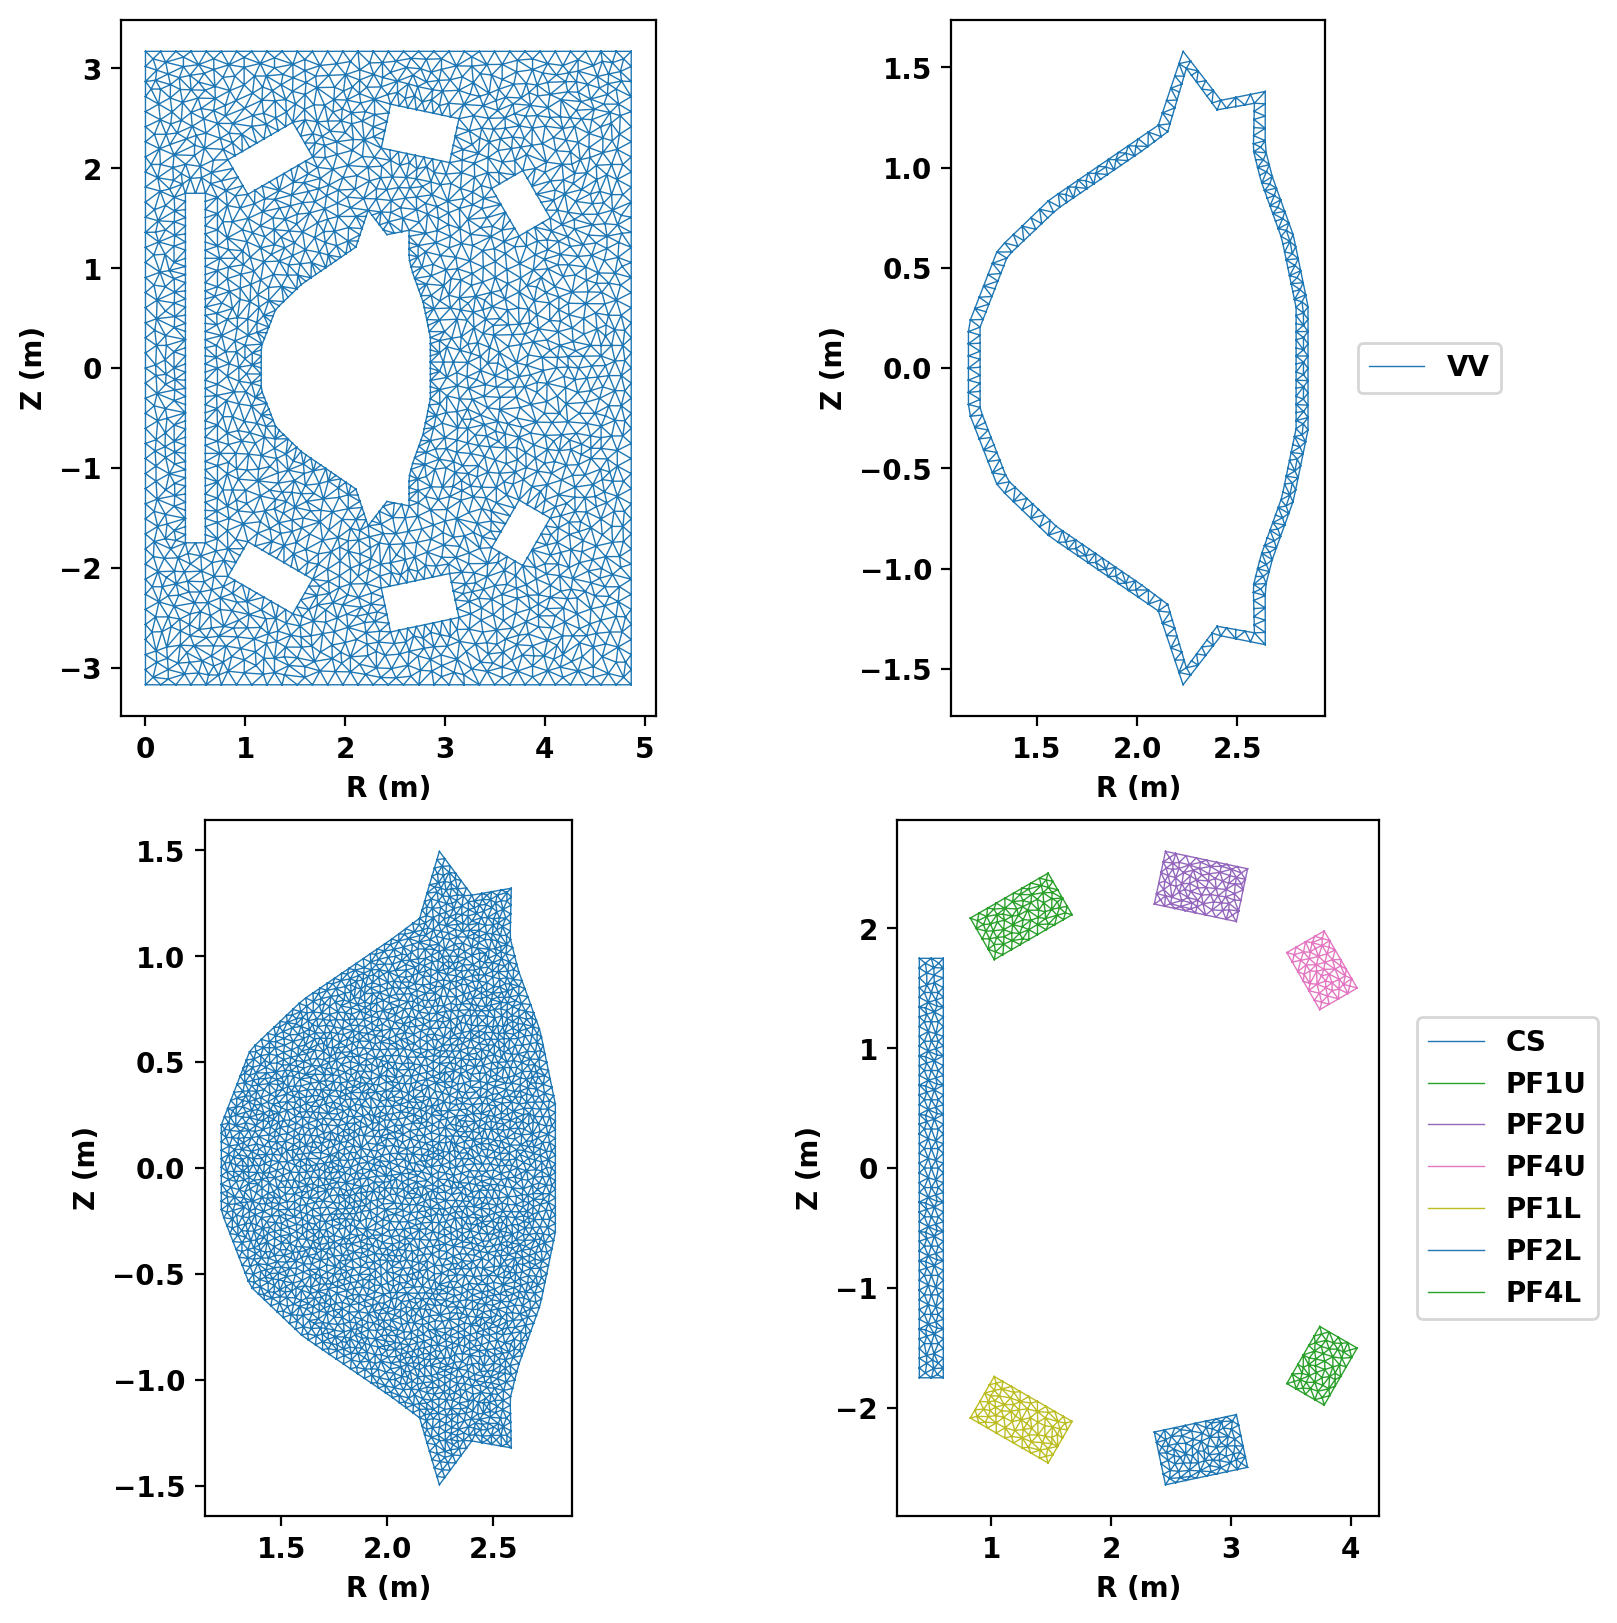

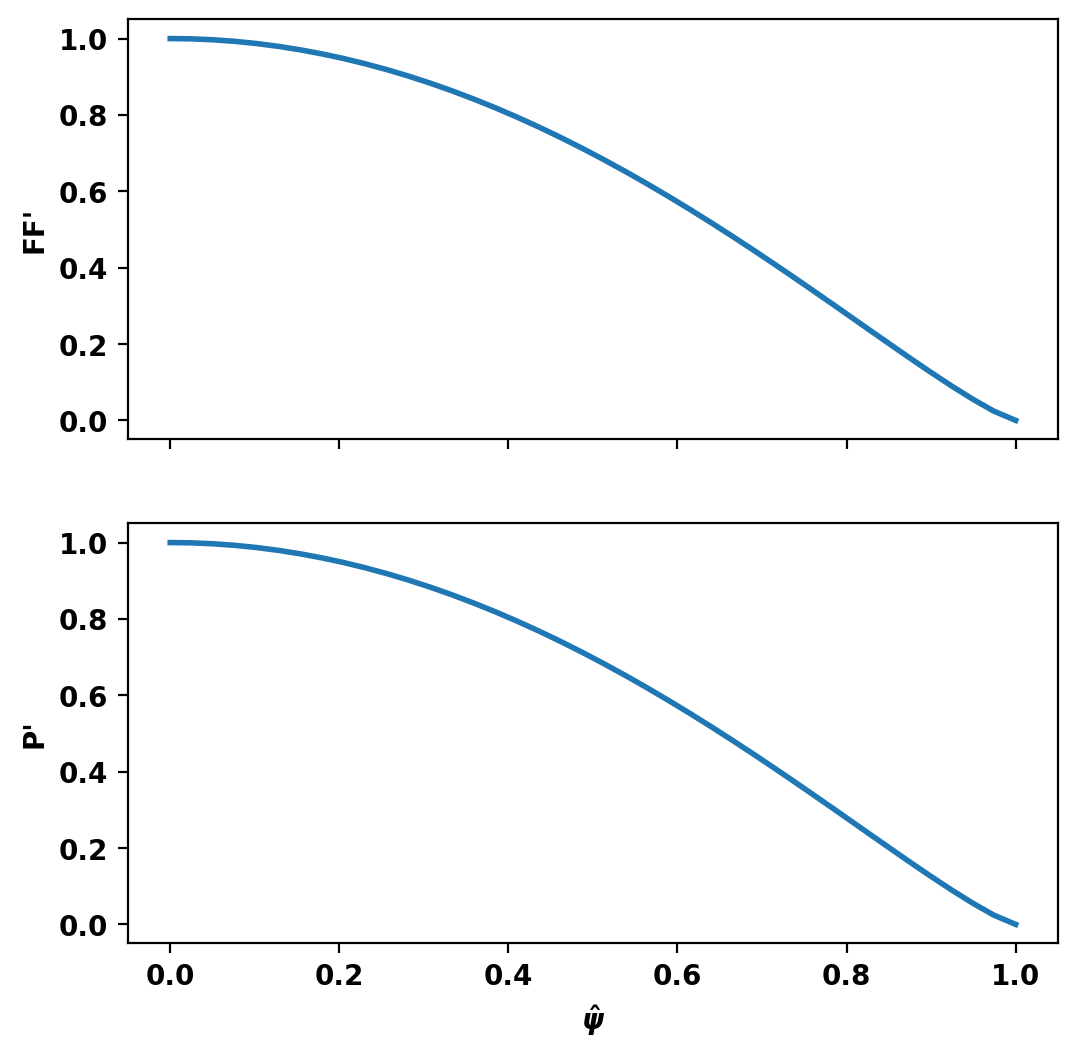

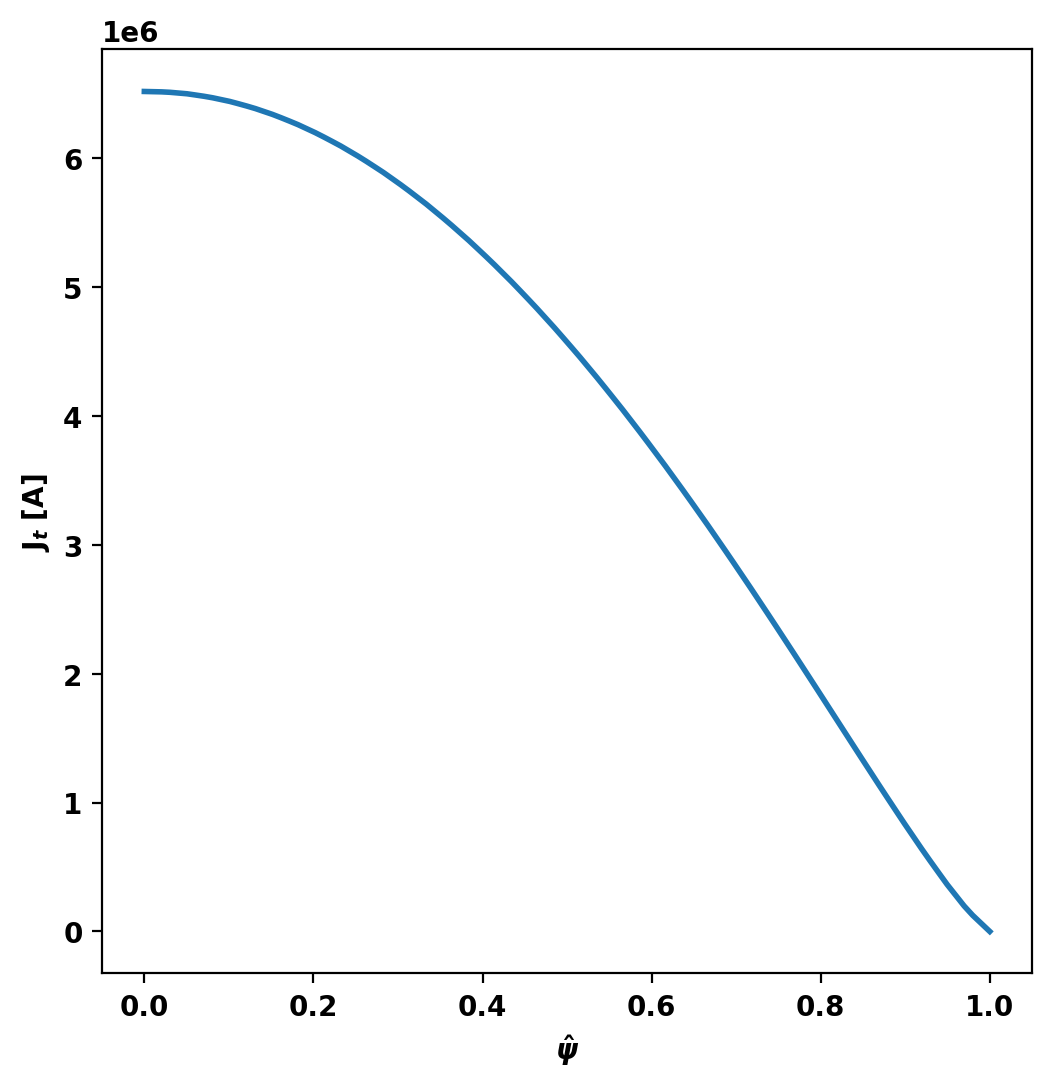

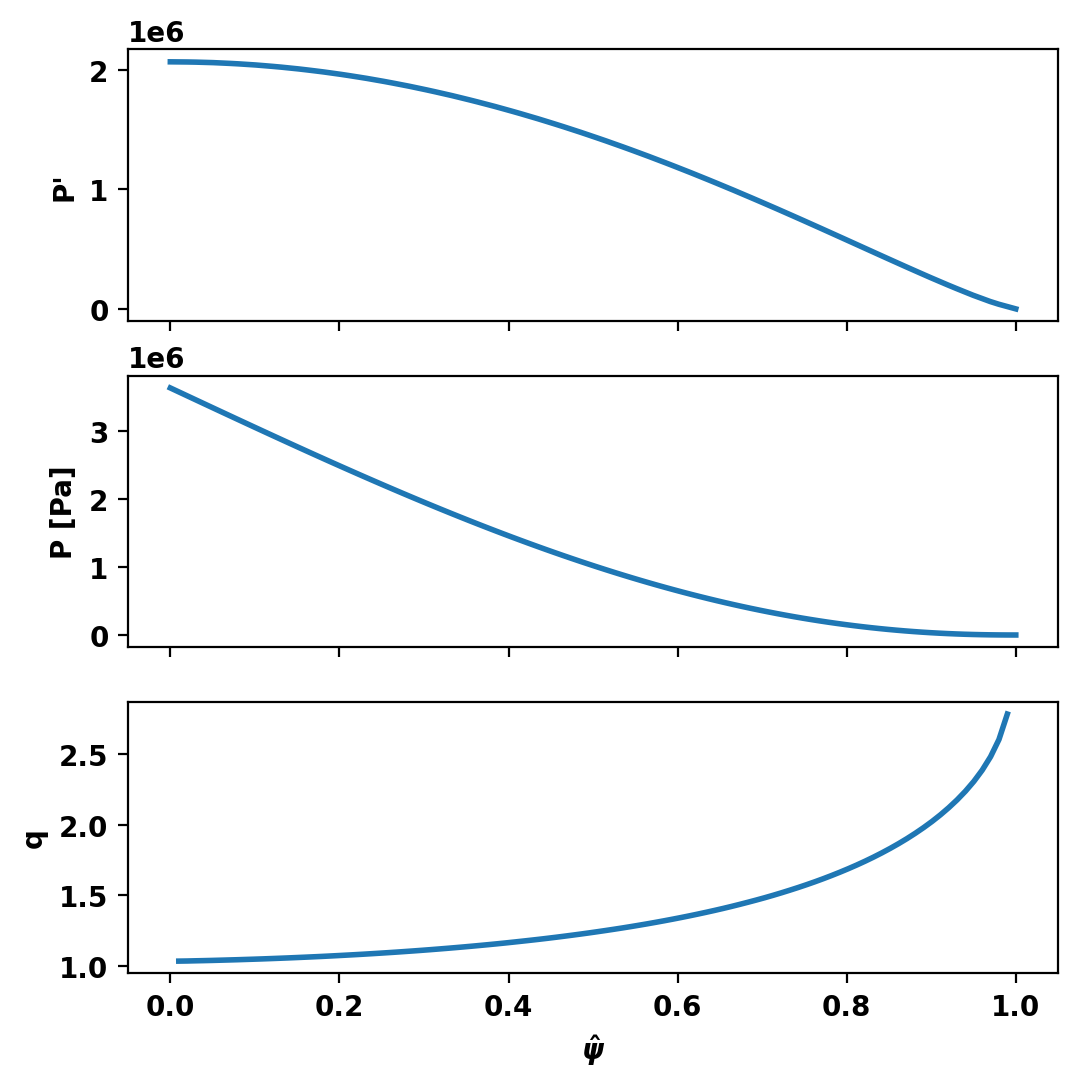

In [7]:
# creates mesh, computes eq, etc.

############## CREATE MESH
mesh_pts, mesh_lc, mesh_reg = gs_mesh.build_mesh()
coil_dict = gs_mesh.get_coils()
cond_dict = gs_mesh.get_conductors()
fig, ax = plt.subplots(2,2,figsize=(8,8),constrained_layout=True)
gs_mesh.plot_mesh(fig,ax)

############## define `mygs`
mygs = TokaMaker()


# more setup: 

mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
mygs.setup_regions(cond_dict=cond_dict,coil_dict=coil_dict)
# F0=B0*R0
# B0 and R0 set in inputs cell
mygs.setup(order=2,F0=R0*B0)


############## DEFINE TARGETS

mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)


############## DEFINE SHAPE TARGETS

boundary = create_isoflux(4,R0,0.0,a,kappa,delta)

x_points = np.zeros((2,2))
x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
x_weights = 50*np.ones(2)
mygs.set_saddles(x_points, x_weights)


isoflux_weights = 50*np.ones(len(boundary))
mygs.set_isoflux(boundary, isoflux_weights)

############## DEFINE COIL REGULARIZATION MATRIX
coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
targets = np.zeros(mygs.ncoils+1)
coil_weights = 0.5*np.ones(mygs.ncoils+1)

#Constrain CS current
coil_reg_mat[0,0] = 1
targets[0] = -3E6
coil_weights[0] = 5

#Enforce up/down symmetry in PF coils
coil_reg_mat[1,1] = 1
coil_reg_mat[1,5] = -1
coil_reg_mat[2,2] = 1
coil_reg_mat[2,6] = -1
coil_reg_mat[3,3] = 1
coil_reg_mat[3,7] = -1
coil_reg_mat[4,4] = 1
# coil_reg_mat[4,8] = -1

mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)


############## SET UPPER AND LOWER COIL CURRENT LIMITS
coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11
mygs.set_coil_bounds(coil_bounds)

############## DEFINE FLUX FUNCTIONS
# Set profiles
ffp_prof = create_power_flux_fun(40,2,1.25)
pp_prof = create_power_flux_fun(40,2,1.25)

fig, ax = plt.subplots(2,1,sharex=True)
# Plot F*F'
ax[0].plot(ffp_prof['x'],ffp_prof['y'])
ax[0].set_ylabel("FF'")
# Plot P'
ax[1].plot(pp_prof['x'],pp_prof['y'])
ax[1].set_ylabel("P'")
_ = ax[-1].set_xlabel(r"$\hat{\psi}$")

mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)


############## COMPUTE EQUILIBRIUM
mygs.init_psi(R0,Z0,a, kappa,delta)
mygs.solve()




# Check toroidal current profile

def jtor_from_GS(ffprime, pprime, R_avg, one_over_R_avg):
    r'''! Convert from J_toroidal to FF' using Grad-Shafranov equation

    @param jtor Toroidal current profile
    @param R_avg Flux averaged R, calculated by TokaMaker
    @param one_over_R_avg Flux averaged 1/R, calculated by TokaMaker
    @param pprime dP/dPsi profile
    '''
    mu0 = np.pi*4.E-7
    jtor = 0.5*ffprime * (one_over_R_avg / mu0) + R_avg * pprime

    return jtor

psi,f,fp,p,pp = mygs.get_profiles(npsi=100)
psi_q,qvals,ravgs,dl,rbounds,zbounds = mygs.get_q(psi_pad=0.01,npsi=100)
R_avg = ravgs[0]
one_over_R_avg = ravgs[1]
ffprime = f*fp
jtor = jtor_from_GS(ffprime, pp, R_avg, one_over_R_avg)

fig, ax = plt.subplots(1,1)
# Plot Jtor
ax.plot(psi,jtor)
ax.set_ylabel("J$_t$ [A]")
_ = ax.set_xlabel(r"$\hat{\psi}$")

# Check P, P', q profiles
fig, ax = plt.subplots(3,1,sharex=True)
# Plot P'
ax[0].plot(psi,pp)
ax[0].set_ylabel("P'")
# Plot P
ax[1].plot(psi,p)
ax[1].set_ylabel("P [Pa]")
# Plot q
ax[2].plot(psi_q,qvals)
ax[2].set_ylabel("q")
_ = ax[-1].set_xlabel(r"$\hat{\psi}$")

# Check global beta, beta_N
Ip,centroid,vol,pvol,dflux,tflux,Bp_vol = mygs.get_globals()


mu0 = 4*np.pi*1e-07
beta = (2.0*pvol*mu0/vol)/(B0**2)
betan = beta*(B0)*a/(Ip/1e+06)
print('beta = '+str(beta*100))
print('beta_n = '+str(betan*100))


Equilibrium Statistics:
  Topology                =   Diverted
  Toroidal Current [A]    =    9.7200E+06
  Current Centroid [m]    =    2.096 -0.002
  Magnetic Axis [m]       =    2.145 -0.002
  Elongation              =    1.478 (U:  1.432, L:  1.524)
  Triangularity           =   -0.434 (U: -0.402, L: -0.465)
  Plasma Volume [m^3]     =   26.844
  q_0, q_95               =    1.036  2.304
  Peak Pressure [Pa]      =    3.6255E+06
  Stored Energy [J]       =    4.3628E+07
  <Beta_pol> [%]          =   51.3901
  <Beta_tor> [%]          =    2.0777
  Diamagnetic flux [Wb]   =    2.3504E-01
  Toroidal flux [Wb]      =    2.4758E+01
  l_i                     =    0.9266
  beta_n 		  =    1.681
Saving EQDSK file
 "none"


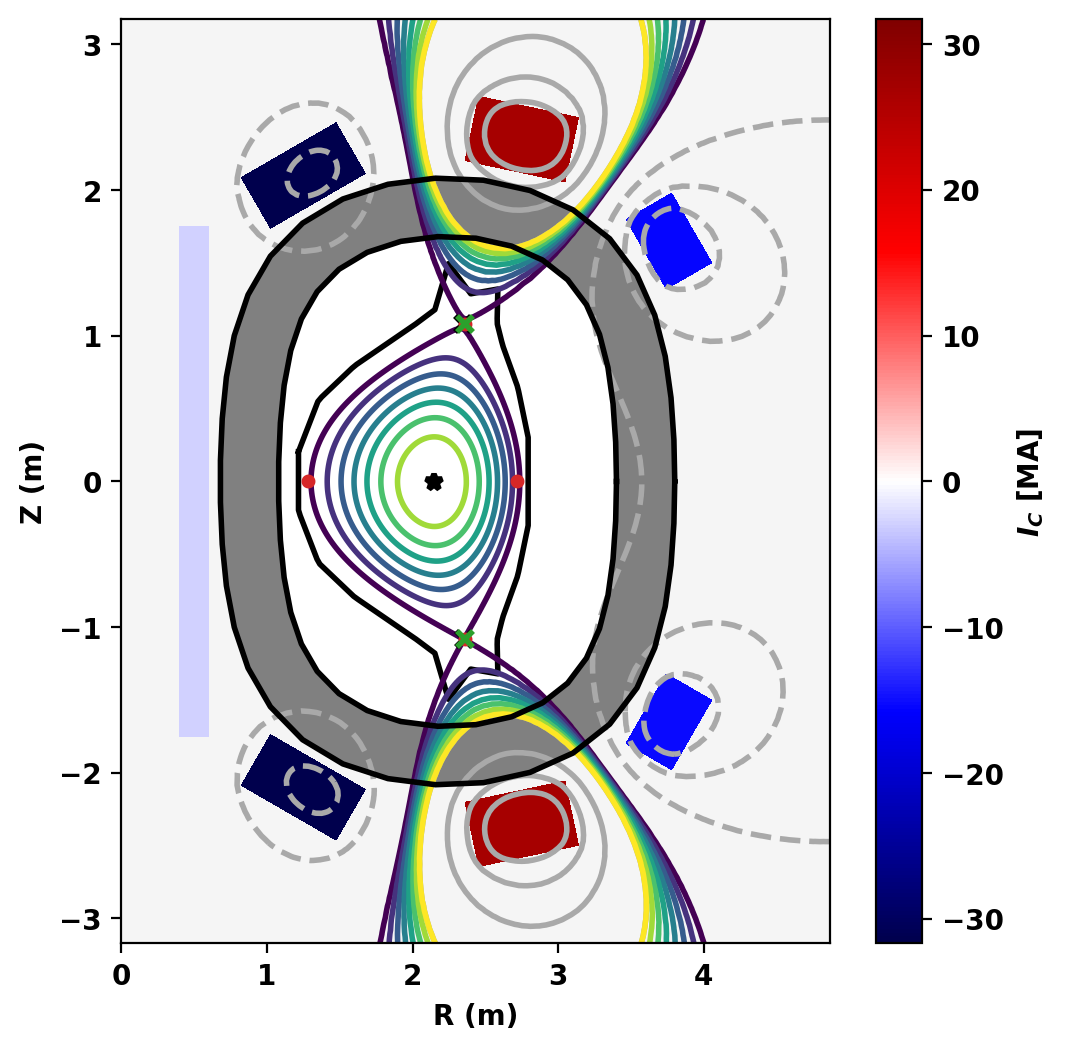

In [8]:
############## PLOT EQ AND EQ STATISTICS

fig, ax = plt.subplots()
mygs.plot_machine(fig,ax,coil_colormap='seismic',coil_symmap=True,coil_scale=1.E-6,coil_clabel=r'$I_C$ [MA]')
mygs.plot_psi(fig,ax,vacuum_nlevels=4)
ax.set_xlabel('R (m)')
ax.set_ylabel('Z (m)')
mygs.plot_constraints(fig,ax,isoflux_color='tab:red',isoflux_marker='.')

# plot TF Coils
ax.plot(tf_inner[:,0], tf_inner[:,1], color='black')
ax.plot(tf_outer[:,0], tf_outer[:,1], color='black')
ax.fill(tf_inner[:,0], tf_inner[:,1],tf_outer[:,0], tf_outer[:,1], color = 'gray')
ax.fill(tf_inner[:,0], tf_inner[:,1], color = 'white')

mygs.print_info()
print('  beta_n \t\t  =    '+str(round(betan*100,4)))
mygs.save_eqdsk(nb_name+'_'+tf_coil_shape+'.geqdsk');

In [9]:
coil_currents = mygs.get_coil_currents() # in order of: CS, PF1U, PF2U, PF3U, PF4U, PF1L, PF2L, PF3L, PF4L
# print(coil_currents[0])
# print('CS current density limit (MANTA) = \t   80\t\t A/mm^2')
print('CS current: \t ', round(coil_currents[0][0]/1e6,5), ' \tMA \t ', round(coil_currents[0][0]/(CSh*CSw*1e6),5), '\t A/mm^2\n')

# print('PF current density limit (MANTA) = \t   175\t\t A/mm^2')
print('PF1 current: \t ', round(coil_currents[0][1]/1e6,5), ' \tMA \t ', round(coil_currents[0][1]/(PF1w*PF1h*1e6),5), '\t A/mm^2')
print('PF2 current: \t ', round(coil_currents[0][2]/1e6,5), ' \tMA \t ', round(coil_currents[0][2]/(PF2w*PF2h*1e6),5), '\t A/mm^2')
# print('PF3 current: \t ', round(coil_currents[0][3]/1e6,5), ' \tMA, \t ', round(coil_currents[0][3]/(PF3w*PF3h*1e6),5), '\t A/mm^2')
print('PF4 current: \t ', round(coil_currents[0][3]/1e6,5), ' \tMA \t ', round(coil_currents[0][3]/(PF4w*PF4h*1e6),5), '\t A/mm^2')


CS current: 	  -2.93823  	MA 	  -4.19747 	 A/mm^2

PF1 current: 	  -31.53807  	MA 	  -105.12689 	 A/mm^2
PF2 current: 	  26.79126  	MA 	  85.05162 	 A/mm^2
PF4 current: 	  -15.36657  	MA 	  -77.60892 	 A/mm^2
